## <font color='black'>Data Science Para Análise Multivariada de Dados</font>
#### <font color='blue'>Prevendo a Expectativa de Vida Através de Indicadores Socioeconômicos</font>

## Instalando e Carregando os Pacotes

In [1]:
# Imports
import joblib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [167]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Henrique Bardella" 
%watermark --python
%watermark --iversions

Author: Henrique Bardella

Python implementation: CPython
Python version       : 3.9.12
IPython version      : 8.4.0

matplotlib: 3.7.1
numpy     : 1.21.5
seaborn   : 0.11.2
pandas    : 1.5.0
sklearn   : 0.0
joblib    : 1.2.0



## Carregando e Compreendendo os Dados

In [3]:
# Carregando os dados
dsa_dados = pd.read_csv("dataset.csv")

In [4]:
dsa_dados.shape

(2938, 22)

In [5]:
# Amostra dos dados
dsa_dados.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2862,Venezuela (Bolivarian Republic of),2011,Developing,73.8,158.0,9,6.74,0.000000,78.0,0,...,78.0,5.24,78.0,0.1,NaN,NaN,1.6,1.5,0.756,14.1
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.000000,81.0,183,...,77.0,6.41,81.0,3.7,NaN,NaN,6.5,6.4,NaN,NaN
1087,Guinea,2002,Developing,52.9,337.0,35,0.21,21.337818,NaN,2151,...,56.0,3.76,53.0,3.0,322.811171,9137345.0,9.9,9.9,0.329,5.5
2110,Republic of Moldova,2008,Developing,68.9,228.0,1,9.07,0.000000,97.0,0,...,96.0,11.41,9.0,0.1,NaN,NaN,2.9,3.1,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.000000,82.0,137,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
2469,Sudan,2003,Developing,59.6,278.0,69,1.74,35.352647,NaN,4381,...,69.0,3.18,69.0,0.2,477.738478,29435944.0,NaN,NaN,0.409,5.6
2844,Vanuatu,2013,Developing,71.6,135.0,0,0.01,447.545645,64.0,0,...,65.0,3.92,64.0,0.1,3167.343560,253142.0,1.5,1.4,0.591,10.8
2666,Tunisia,2014,Developing,75.1,12.0,3,1.39,604.870132,98.0,15,...,98.0,7.00,98.0,0.1,4271.681720,1114398.0,6.5,6.4,0.722,14.7
547,Chile,2012,Developing,79.9,84.0,2,6.76,2260.777642,9.0,0,...,9.0,7.24,9.0,0.1,15431.929300,1739746.0,0.8,0.8,0.826,15.5
2711,Turkmenistan,2001,Developing,64.0,221.0,7,2.35,106.180706,NaN,9,...,94.0,3.87,95.0,0.1,774.476339,45648.0,3.6,3.5,0.000,10.2


In [6]:
# Tipos de dados
dsa_dados.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

### Ajuste inicial dos dados

In [7]:
# Colunas
dsa_dados.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

> Desconsiderando algumas variáveis: percentage expenditure, under-five deaths e Income composition of resources não estão sendo consideradas. Essas variáveis não apresentam descrição clara na fonte de dados e por isso estão sendo removidas da análise.

In [8]:
# Ajusta o dataframe
df_dsa = pd.DataFrame({'country': dsa_dados['Country'],
                       'life_expectancy': dsa_dados['Life expectancy '],
                       'year': dsa_dados['Year'],
                       'status': dsa_dados['Status'],
                       'adult_mortality': dsa_dados['Adult Mortality'],
                       'inf_death': dsa_dados['infant deaths'],
                       'alcohol': dsa_dados['Alcohol'],
                       'hepatitisB': dsa_dados['Hepatitis B'],
                       'measles': dsa_dados['Measles '],
                       'bmi': dsa_dados[' BMI '],
                       'polio': dsa_dados['Polio'],
                       'diphtheria': dsa_dados['Diphtheria '],
                       'hiv': dsa_dados[' HIV/AIDS'],
                       'gdp': dsa_dados['GDP'],
                       'total_expenditure': dsa_dados['Total expenditure'],
                       'thinness_till19': dsa_dados[' thinness  1-19 years'],
                       'thinness_till9': dsa_dados[' thinness 5-9 years'],
                       'school': dsa_dados['Schooling'],
                       'population': dsa_dados[' Population']})

In [9]:
# Shape
df_dsa.shape

(2938, 19)

In [10]:
df_dsa.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
dtype: object

In [11]:
df_dsa.head()

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
0,Afghanistan,65.0,2015,Developing,263.0,62,0.01,65.0,1154,19.1,6.0,65.0,0.1,584.259210,8.16,17.2,17.3,10.1,33736494.0
1,Afghanistan,59.9,2014,Developing,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
2,Afghanistan,59.9,2013,Developing,268.0,66,0.01,64.0,430,18.1,62.0,64.0,0.1,631.744976,8.13,17.7,17.7,9.9,31731688.0
3,Afghanistan,59.5,2012,Developing,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,Afghanistan,59.2,2011,Developing,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0


## Construindo o Dicionário de Dados

In [12]:
# Cria um dicionário com a descrição de cada variável
dsa_df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano em que os dados foram coletados.",
    "status": "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
    "adult_mortality": "Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.",
    "inf_death": "Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Número de casos de sarampo relatados por 1000 habitantes.",
    "bmi": "Índice médio de massa corporal da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes de 10 a 19 anos (%).",
    "thinness_till9": "Prevalência de magreza em crianças de 5 a 9 anos (%).",
    "school": "Número médio de anos de escolaridade.",
    "population": "População total do país."
}

In [13]:
dsa_df_dict

{'country': 'País de origem dos dados.',
 'life_expectancy': 'Expectativa de vida ao nascer, em anos.',
 'year': 'Ano em que os dados foram coletados.',
 'status': "Status de desenvolvimento do país ('Developing' para países em desenvolvimento, 'Developed' para países desenvolvidos).",
 'adult_mortality': 'Taxa de mortalidade de adultos entre 15 e 60 anos por 1000 habitantes.',
 'inf_death': 'Número de mortes de crianças com menos de 5 anos por 1000 nascidos vivos.',
 'alcohol': 'Consumo de álcool per capita (litros de álcool puro por ano).',
 'hepatitisB': 'Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).',
 'measles': 'Número de casos de sarampo relatados por 1000 habitantes.',
 'bmi': 'Índice médio de massa corporal da população adulta.',
 'polio': 'Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).',
 'diphtheria': 'Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).',
 'hiv': 'Prevalência de HIV na popula

In [14]:
dsa_df_dict['life_expectancy']

'Expectativa de vida ao nascer, em anos.'

### Análise exploratória

<Axes: >

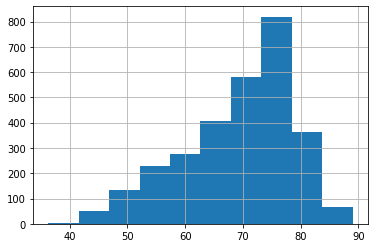

In [15]:
# Plot do histograma da variável alvo (variável quantitativa)
df_dsa['life_expectancy'].hist()

In [16]:
# Resumo estatístico
df_dsa.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2928.000000,2938.000000,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
mean,69.224932,2007.518720,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,9.523867,4.613841,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,36.300000,2000.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,63.100000,2004.000000,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,72.100000,2008.000000,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,75.700000,2012.000000,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.870000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.600000,119172.741800,17.60000,27.700000,28.600000,20.700000,1.293859e+09


In [17]:
# Resumo estatístico (variáveis categóricas)
df_dsa.describe(include = ['object'])

,country,status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [18]:
# Resumo estatístico de todas as variáveis
df_dsa.describe(include = 'all')

,country,life_expectancy,year,status,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2938,2928.000000,2938.000000,2938,2928.000000,2938.000000,2744.000000,2385.000000,2938.000000,2904.000000,2919.000000,2919.000000,2938.000000,2490.000000,2712.00000,2904.000000,2904.000000,2775.000000,2.286000e+03
unique,193,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,69.224932,2007.518720,NaN,164.796448,30.303948,4.602861,80.940461,2419.592240,38.321247,82.550188,82.324084,1.742103,7483.158469,5.93819,4.839704,4.870317,11.992793,1.275338e+07
std,NaN,9.523867,4.613841,NaN,124.292079,117.926501,4.052413,25.070016,11467.272489,20.044034,23.428046,23.716912,5.077785,14270.169342,2.49832,4.420195,4.508882,3.358920,6.101210e+07
min,NaN,36.300000,2000.000000,NaN,1.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.37000,0.100000,0.100000,0.000000,3.400000e+01
25%,NaN,63.100000,2004.000000,NaN,74.000000,0.000000,0.877500,77.000000,0.000000,19.300000,78.000000,78.000000,0.100000,463.935626,4.26000,1.600000,1.500000,10.100000,1.957932e+05
50%,NaN,72.100000,2008.000000,NaN,144.000000,3.000000,3.755000,92.000000,17.000000,43.500000,93.000000,93.000000,0.100000,1766.947595,5.75500,3.300000,3.300000,12.300000,1.386542e+06
75%,NaN,75.700000,2012.000000,NaN,228.000000,22.000000,7.702500,97.000000,360.250000,56.200000,97.000000,97.000000,0.800000,5910.806335,7.49250,7.200000,7.200000,14.300000,7.420359e+06


In [19]:
# Função para o plot da relação da variável algo com alguns atributos
def dsa_get_pairs(data, alvo, atributos, n):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]
                    
    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = 'reg', height = 3)
    
    return                    

In [20]:
# variável alvo
alvo = ['life_expectancy']

In [21]:
# Vamos usar alguns atributos
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

In [22]:
# Descrição da variável
dsa_df_dict['hepatitisB']

'Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).'

In [23]:
# Descrição da variável
dsa_df_dict['total_expenditure']

'Gasto total em saúde como porcentagem do PIB.'

In [24]:
# Descrição da variável
dsa_df_dict['alcohol']

'Consumo de álcool per capita (litros de álcool puro por ano).'

In [25]:
# Descrição da variável
dsa_df_dict['school']

'Número médio de anos de escolaridade.'

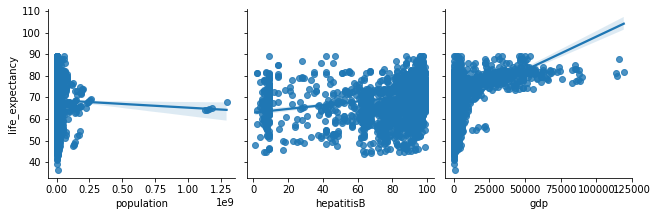

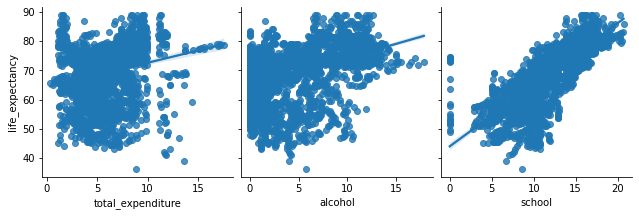

In [26]:
# Verificando outliers
dsa_get_pairs(df_dsa, alvo, atributos, 3)

## Detectando Valores Ausentes

In [27]:
# Visualizando o total de linhas por coluna
df_dsa.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [28]:
# Extraindo o total de valores ausentes por coluna
valores_ausentes = df_dsa.isnull().sum().sort_values(ascending = False)

In [29]:
print(valores_ausentes)

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinness_till9        34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64


In [30]:
# Criando o percentual de valores ausentes
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / df_dsa.shape[0]

In [31]:
print(f'{valores_ausentes_percent * 100} %')

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinness_till9        1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64 %


### Detectando outliers

In [32]:
# Atributos com mais de 5% de valores ausentes
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school'] 

In [33]:
# Cria um novo dataframe
novo_dataframe = df_dsa[atributos]

In [34]:
# Identificação de outliers através do método IQR (interquartile range)
Q1 = novo_dataframe.quantile(0.25)
Q3 = novo_dataframe.quantile(0.75)

IQR = Q3 - Q1

In [35]:
Q1

population           195793.250000
hepatitisB               77.000000
gdp                     463.935626
total_expenditure         4.260000
alcohol                   0.877500
school                   10.100000
Name: 0.25, dtype: float64

In [36]:
# Definir outliers como aqueles valores que estão fora do intervalo [ q1 - 1.5 * IQR, Q3 + 1.5 *IQR]
outliers = ((novo_dataframe < (Q1 - 1.5 *IQR)) | (novo_dataframe > (Q3 + 1.5 * IQR))).sum()

In [37]:
outliers

population           294
hepatitisB           254
gdp                  365
total_expenditure     32
alcohol                0
school                44
dtype: int64

In [38]:
# Cria um resumo com os outliers
outliers_summary = pd.DataFrame({'Outliers': outliers, 'Percentual': (outliers / len(novo_dataframe)) * 100})

In [39]:
# Retorna os resultados quando o valor for maior do que zero
outliers_summary[outliers_summary['Outliers'] > 0]

,Outliers,Percentual
population,294,10.006807
hepatitisB,254,8.645337
gdp,365,12.423417
total_expenditure,32,1.089176
school,44,1.497617


### Tratamento de outliers

Decisão: Remover os outliers pela pela regra estatística do intervalo interquartil (IQR)

Considerações Importantes:

- A regra do 1.5 IQR é um método comum para identificar outliers, mas não é uma regra rígida.
- A escolha do multiplicador (1.5) pode variar em diferentes contextos e conjuntos de dados.
- É importante analisar visualmente a distribuição dos dados para confirmar a presença de outliers e ajustar os limites, se necessário.
- Outras técnicas para identificar outliers podem ser utilizadas em conjunto com a regra do IQR.

In [40]:
# Definindo os limites para filtrar os outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

In [41]:
# Filtrando os outliers
novo_df_dsa = df_dsa[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis = 1)]

In [42]:
novo_df_dsa.shape

(2044, 19)

In [43]:
# Resumo estatístico
novo_df_dsa.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [44]:
# Valor máximo da população
novo_df_dsa.population.max()

17899562.0

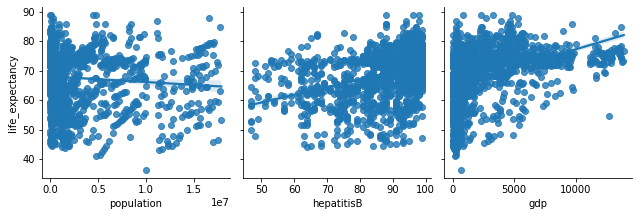

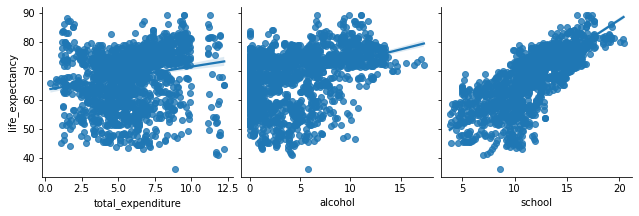

In [45]:
# Verificando outliers
dsa_get_pairs(novo_df_dsa, alvo, atributos, 3)

## Tratamento de Valores Ausentes

Decisão: Preencher os valores ausentes com a mediana da variável.

In [46]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df_dsa.isnull().sum().sort_values(ascending = False)

In [47]:
# Checando percentual dos valores ausentes
valores_ausentes_perc = valores_ausentes[valores_ausentes > 0 ] / novo_df_dsa.shape[0]
print(f'{valores_ausentes_percent * 100} %')

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinness_till9        1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64 %


In [48]:
# Função para o Replace das linhas vazias com a mediana
def impute_median(dados):
    return dados.fillna(dados.median())

In [49]:
novo_df_dsa.describe()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
count,2036.000000,2044.000000,2036.000000,2044.000000,1908.000000,1653.000000,2044.000000,2032.000000,2041.000000,2041.000000,2044.000000,1668.000000,1883.000000,2032.000000,2032.000000,1910.000000,1.550000e+03
mean,68.261444,2007.516634,173.697937,21.272016,4.250854,88.543860,2043.051859,37.229429,83.469868,84.229789,1.906115,2603.414714,5.817047,4.973327,5.039813,11.779791,2.862564e+06
std,9.180601,4.620838,124.821601,75.877341,3.821064,11.667147,11166.996177,19.540099,22.293545,20.802376,5.353430,3051.987902,2.167468,4.070398,4.188165,2.893174,4.147575e+06
min,36.300000,2000.000000,1.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,0.100000,3.800000,3.400000e+01
25%,62.475000,2003.000000,83.750000,0.000000,0.847500,84.000000,0.000000,19.200000,78.000000,81.000000,0.100000,387.645945,4.380000,1.900000,1.900000,10.100000,1.413295e+05
50%,71.400000,2008.000000,154.000000,3.000000,3.400000,93.000000,10.000000,41.300000,93.000000,93.000000,0.100000,1312.038142,5.710000,3.550000,3.600000,12.100000,8.968025e+05
75%,74.700000,2012.000000,235.000000,17.000000,6.725000,97.000000,256.250000,54.900000,97.000000,97.000000,1.000000,3936.450613,7.130000,7.325000,7.400000,13.700000,3.712494e+06
max,89.000000,2015.000000,723.000000,1800.000000,17.310000,99.000000,212183.000000,87.300000,99.000000,99.000000,50.300000,13893.187680,12.250000,27.700000,28.600000,20.400000,1.789956e+07


In [50]:
# Removendo valores missing (observe as diferentes formas de notação do lado esquerdo do sinal de igual)
novo_df_dsa.loc[:,'population'] = novo_df_dsa['population'].transform(impute_median)
novo_df_dsa.hepatitisB = novo_df_dsa['hepatitisB'].transform(impute_median)
novo_df_dsa.alcohol = novo_df_dsa['alcohol'].transform(impute_median)
novo_df_dsa.total_expenditure = novo_df_dsa['total_expenditure'].transform(impute_median)
novo_df_dsa.gdp = novo_df_dsa['gdp'].transform(impute_median)
novo_df_dsa.school = novo_df_dsa['school'].transform(impute_median)

In [51]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df_dsa.isnull().sum().sort_values(ascending = False)

In [52]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df_dsa.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

bmi                0.587084
thinness_till9     0.587084
thinness_till19    0.587084
adult_mortality    0.391389
life_expectancy    0.391389
diphtheria         0.146771
polio              0.146771
dtype: float64 %


In [53]:
# Remove registros com valores nulos
novo_df_dsa.dropna(inplace = True)

In [54]:
# Verificando o total de valores ausentes
valores_ausentes = novo_df_dsa.isnull().sum().sort_values(ascending = False)

In [55]:
# Checando percentual de valores missing
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df_dsa.shape[0] 
print(f'{valores_ausentes_percent * 100} %')

Series([], dtype: float64) %


In [56]:
# Shape
novo_df_dsa.shape

(2023, 19)

In [57]:
# Info
novo_df_dsa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2023 entries, 1 to 2937
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            2023 non-null   object 
 1   life_expectancy    2023 non-null   float64
 2   year               2023 non-null   int64  
 3   status             2023 non-null   object 
 4   adult_mortality    2023 non-null   float64
 5   inf_death          2023 non-null   int64  
 6   alcohol            2023 non-null   float64
 7   hepatitisB         2023 non-null   float64
 8   measles            2023 non-null   int64  
 9   bmi                2023 non-null   float64
 10  polio              2023 non-null   float64
 11  diphtheria         2023 non-null   float64
 12  hiv                2023 non-null   float64
 13  gdp                2023 non-null   float64
 14  total_expenditure  2023 non-null   float64
 15  thinness_till19    2023 non-null   float64
 16  thinness_till9     2023 

In [58]:
# Drop das variáveis
novo_df_dsa.drop(['country', 'status'], axis = 1, inplace = True)

In [59]:
# Shape do dataset original
dsa_dados.shape

(2938, 22)

In [60]:
# Shape do dataset após a limpeza
novo_df_dsa.shape

(2023, 17)

## Engenharia de Atributos

> As variáveis alcohol e bmi têm uma relação direta e natural. Vamos criar uma nova variável chamada life_style com a combinação dessas duas variáveis.

In [61]:
novo_df_dsa.columns

Index(['life_expectancy', 'year', 'adult_mortality', 'inf_death', 'alcohol',
       'hepatitisB', 'measles', 'bmi', 'polio', 'diphtheria', 'hiv', 'gdp',
       'total_expenditure', 'thinness_till19', 'thinness_till9', 'school',
       'population'],
      dtype='object')

In [62]:
# Descrição da variável
dsa_df_dict['bmi']

'Índice médio de massa corporal da população adulta.'

In [63]:
# Descrição da variável
dsa_df_dict['alcohol']

'Consumo de álcool per capita (litros de álcool puro por ano).'

In [64]:
# Amostra dos dados
novo_df_dsa.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0


In [65]:
# Criando a nova variável
novo_df_dsa['lifestyle'] = 0
novo_df_dsa.lifestyle = novo_df_dsa['bmi'] * novo_df_dsa['alcohol']

In [66]:
# Amostra dos dados
novo_df_dsa.head()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,lifestyle
1,59.9,2014,271.0,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,17.5,10.0,327582.0,0.186
3,59.5,2012,272.0,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,18.0,9.8,3696958.0,0.176
4,59.2,2011,275.0,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,18.2,9.5,2978599.0,0.172
5,58.8,2010,279.0,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,18.4,9.2,2883167.0,0.167
6,58.6,2009,281.0,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,18.7,8.9,284331.0,0.162


In [67]:
# Resumo estatístico
novo_df_dsa.lifestyle.describe()

count    2023.000000
mean      178.996408
std       209.416553
min         0.018000
25%        18.140500
50%        95.323000
75%       257.394000
max      1036.869000
Name: lifestyle, dtype: float64

In [68]:
# Verifique se há valores ausentes
valores_ausentes = novo_df_dsa.isnull().sum().sort_values(ascending = False)

In [69]:
# Visualizando valores ausentes
valores_ausentes

life_expectancy      0
year                 0
population           0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
hiv                  0
diphtheria           0
polio                0
bmi                  0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
lifestyle            0
dtype: int64

In [70]:
novo_df_dsa.dtypes

life_expectancy      float64
year                   int64
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
lifestyle            float64
dtype: object

## Análise de Correlação Para Verificar Multicolinearidade

Queremos que as variáveis preditoras tenham uma alta correlação com a variável alvo, mas não queremos que as variáveis preditoras tenham alta correlação entre si. Se houver alta correlação entre as variáveis preditoras isso é chamado de multicolinearidade e fere uma das suposições da regressão.

A correlação é uma medida da relação entre as variáveis. O coeficiente de correlação é um valor de -1 a +1, sendo:

**-1 indica alta correlação negativa.**

**+1 indica ata correlação positiva.**

**0 indica que não há correlação.**

Correlação não implica causalidade. Por exemplo: Sempre que aumenta o consumo de sorvete aumenta a presença de tubarões na praia. Provavelmente ambos os eventos ocorrem no verão e estão correlacionados, mas isso não significa que um evento causa o outro. Para afirmar isso teríamos que fazer uma análise de causalidade.

In [71]:
# Correlação das variáveis numéricas no conjunto de dados
novo_df_dsa.corr()

,life_expectancy,year,adult_mortality,inf_death,alcohol,hepatitisB,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,thinness_till9,school,population,lifestyle
life_expectancy,1.000000,0.204556,-0.658916,-0.206443,0.342425,0.257860,-0.115350,0.557954,0.452564,0.483659,-0.573127,0.360736,0.175738,-0.433580,-0.429357,0.708272,-0.105317,0.441366
year,0.204556,1.000000,-0.091760,-0.059838,-0.066639,-0.003178,-0.064347,0.096763,0.147489,0.228939,-0.158820,0.170945,0.070267,-0.059353,-0.055950,0.219471,0.020981,-0.017373
adult_mortality,-0.658916,-0.091760,1.000000,0.099370,-0.149204,-0.188950,0.035432,-0.366745,-0.228938,-0.221803,0.512978,-0.197863,-0.090963,0.299104,0.302507,-0.383901,0.096768,-0.231128
inf_death,-0.206443,-0.059838,0.099370,1.000000,-0.127545,-0.122515,0.480129,-0.221948,-0.183569,-0.183910,0.039115,-0.120331,-0.121871,0.321487,0.354512,-0.214215,0.111901,-0.156769
alcohol,0.342425,-0.066639,-0.149204,-0.127545,1.000000,0.193844,-0.045324,0.310448,0.187916,0.199958,-0.036268,0.289360,0.262657,-0.386629,-0.379482,0.464657,-0.007040,0.878858
hepatitisB,0.257860,-0.003178,-0.188950,-0.122515,0.193844,1.000000,-0.043089,0.115409,0.393191,0.391270,-0.090390,0.167829,0.046093,-0.086406,-0.102546,0.263879,-0.056455,0.181579
measles,-0.115350,-0.064347,0.035432,0.480129,-0.045324,-0.043089,1.000000,-0.142187,-0.110853,-0.123043,0.024412,-0.065666,-0.101675,0.133515,0.137056,-0.089084,-0.005326,-0.085123
bmi,0.557954,0.096763,-0.366745,-0.221948,0.310448,0.115409,-0.142187,1.000000,0.253961,0.273612,-0.244626,0.323198,0.200959,-0.541904,-0.550691,0.552766,-0.056945,0.599062
polio,0.452564,0.147489,-0.228938,-0.183569,0.187916,0.393191,-0.110853,0.253961,1.000000,0.676507,-0.143756,0.198453,0.141294,-0.166819,-0.166363,0.382712,-0.045542,0.219793
diphtheria,0.483659,0.228939,-0.221803,-0.183910,0.199958,0.391270,-0.123043,0.273612,0.676507,1.000000,-0.154179,0.222266,0.157976,-0.189487,-0.186992,0.430627,-0.035142,0.225132


In [72]:
# Função para filtrar e visualizar correlação
def dsa_filtrar_e_visualizar_correlacao(df, threshold, drop_column = None):

    # Calcula a matriz de correlação
    corr = df.corr()
    
    # Aplica os filtros de limiar, excluindo a correlação perfeita
    filtro = (abs(corr) >= threshold) & (corr != 1.0)
    df_filtrado = corr.where(filtro).dropna(how = 'all').dropna(axis = 1, how = 'all')
    
    # Remove a coluna e linha especificada, se fornecido
    if drop_column:
        df_filtrado = df_filtrado.drop(index = drop_column, 
                                       errors = 'ignore').drop(columns = drop_column, 
                                                               errors = 'ignore')
    
    # Visualiza o resultado com um heatmap somente com as variáveis que satisfazem o critério de filtro
    plt.figure(figsize = (8, 6))
    sns.heatmap(df_filtrado, annot = True, cmap = 'coolwarm', center = 0)
    plt.show()

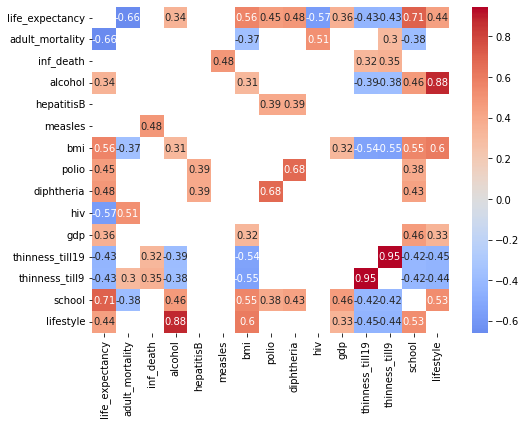

In [73]:
# Executa a função
dsa_filtrar_e_visualizar_correlacao(novo_df_dsa, threshold = 0.3, drop_column = None)

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso critério. São as variáveis preditoras com maior correlação com a variável alvo.

Agora devemos checar uma das suposições da Regressão Linear e identificar possíveis problemas de multicolinearidade (alta correlação entre as variáveis preditoras). Com base nesse critério eliminamos uma de duas variáveis preditoras altamente correlacionadas. Vamos considerar 0.65 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

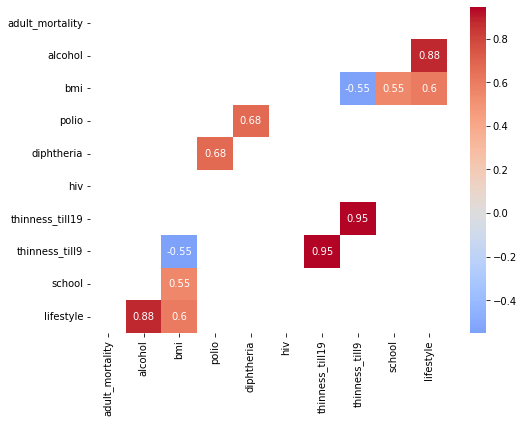

In [74]:
# Executa a função
dsa_filtrar_e_visualizar_correlacao(novo_df_dsa, threshold = 0.55, drop_column = 'life_expectancy')

Observedo a alta correlação entre algumas variáveis preditoras.

### Decisão

**Primeiro Filtro - Correlação com a Variável Alvo**

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso primeiro critério. São as variáveis preditoras com maior correlação com a variável alvo.

**Segundo Filtro - Multicolinearidade**

Com base no filtro de multicolinearidade, as variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle serão as variáveis mantidas para a modelagem estatística.

In [75]:
# Preparando o novo dataset
novo_df_final = pd.DataFrame({'life_expectancy': novo_df_dsa['life_expectancy'],
                              'adult_mortality': novo_df_dsa['adult_mortality'],
                              'diphtheria': novo_df_dsa['diphtheria'],
                              'hiv': novo_df_dsa['hiv'],
                              'gdp': novo_df_dsa['gdp'],
                              'thinness_till19': novo_df_dsa['thinness_till19'],
                              'school': novo_df_dsa['school'],
                              'lifestyle': novo_df_dsa['lifestyle'],})

In [76]:
novo_df_final.head()

,life_expectancy,adult_mortality,diphtheria,hiv,gdp,thinness_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,669.959000,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,445.893298,18.6,8.9,0.162


In [77]:
# Verifica se há valores ausentes
missing_values = novo_df_final.isnull().sum().sort_values(ascending = False)

In [78]:
missing_values

life_expectancy    0
adult_mortality    0
diphtheria         0
hiv                0
gdp                0
thinness_till19    0
school             0
lifestyle          0
dtype: int64

In [79]:
# Visualizando o total de linhas por coluna
novo_df_final.count()

life_expectancy    2023
adult_mortality    2023
diphtheria         2023
hiv                2023
gdp                2023
thinness_till19    2023
school             2023
lifestyle          2023
dtype: int64

In [80]:
novo_df_final.dtypes

life_expectancy    float64
adult_mortality    float64
diphtheria         float64
hiv                float64
gdp                float64
thinness_till19    float64
school             float64
lifestyle          float64
dtype: object

In [81]:
novo_df_final.shape

(2023, 8)

## Usando Machine Learning Para Encontrar as Variáveis Mais Relevantes

O algoritmo RandomForest, que é um tipo de algoritmo de aprendizado de máquina baseado em árvores de decisão, é considerado uma boa opção para encontrar as variáveis mais relevantes (ou "importantes") em um dataset por várias razões:

    - Redução de variância: O RandomForest combina várias árvores de decisão, cada uma construída com uma amostra aleatória do dataset. Isso ajuda a reduzir a variância e a evitar o overfitting, o que significa que o modelo pode generalizar melhor para novos dados.

    - Importância de variáveis: Durante a construção das árvores, o RandomForest avalia a importância de cada variável com base em quanto ela contribui para a melhoria da pureza dos nós (por exemplo, usando o ganho de informação ou a redução da impureza de Gini). Essa avaliação é agregada em todas as árvores para fornecer uma medida de importância para cada variável.

    - Robustez a ruídos e outliers: Como o RandomForest é baseado em árvores de decisão, ele é naturalmente robusto a ruídos e outliers nos dados. Isso o torna uma opção confiável para identificar variáveis importantes, mesmo em datasets com essas características.

    - Facilidade de interpretação: As medidas de importância de variáveis geradas pelo RandomForest são fáceis de interpretar, o que facilita a compreensão de quais variáveis são mais relevantes para a tarefa em questão.

    - Flexibilidade: O RandomForest pode lidar com diferentes tipos de dados (numéricos, categóricos) e é adequado para uma variedade de tarefas de aprendizado de máquina, como classificação e regressão.

**Por essas razões, o RandomForest é frequentemente utilizado para selecionar as variáveis mais relevantes em um dataset, o que pode ajudar a simplificar o modelo e melhorar seu desempenho em tarefas de predição.**

In [82]:
# Separando variáveis independentes (X) e dependente (y)
X = novo_df_final.drop("life_expectancy", axis = 1)
y = novo_df_final['life_expectancy']

In [83]:
# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
# Iniciando e treinado o RandomForestRegressor
modelo = RandomForestRegressor(n_estimators = 100, random_state = 42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [85]:
# Fazendo previsões com o conjunto de teste
y_pred = modelo.predict(X_test)

In [86]:
# Avaliando o modelo
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [87]:
print(f"RMSE: {rmse}")

RMSE: 2.0023653247664783


In [88]:
print('R2 Score:', metrics.r2_score(y_test, y_pred))

R2 Score: 0.9535079541206163


In [89]:
# Identificando a importância das variáveis
importancias = modelo.feature_importances_
variaveis = X.columns

In [90]:
# Dataframe das variáveis mais relevantes
importancias_df = pd.DataFrame({'Variável': variaveis, 
                                'Importância': importancias}).sort_values(by = 'Importância', 
                                                                          ascending = False)

In [91]:
print(importancias_df)

          Variável  Importância
2              hiv     0.607101
0  adult_mortality     0.224181
5           school     0.073162
4  thinness_till19     0.037829
6        lifestyle     0.031248
1       diphtheria     0.017064
3              gdp     0.009415


Os resultados mostram a importância relativa das variáveis no modelo RandomForest. A importância é uma medida de quanto cada variável contribui para a precisão do modelo. Aqui está uma interpretação dos resultados, ordenados do mais ao menos importante:

**HIV**: Esta é a variável mais importante, com uma contribuição de aproximadamente 60.71% para a performance do modelo. Isso indica que a prevalência do HIV no conjunto de dados tem o maior impacto na expectativa de vida, o que é consistente com o entendimento geral de que o HIV é uma grave questão de saúde pública que pode reduzir significativamente a expectativa de vida.

**Adult Mortality**: A mortalidade adulta é a segunda variável mais importante, contribuindo com cerca de 22.42% para a precisão do modelo. Isso sugere que as taxas de mortalidade entre adultos têm um impacto significativo na determinação da expectativa de vida, o que faz sentido, pois taxas mais altas de mortalidade adulta geralmente indicam condições de saúde e de vida piores.

**School**: A escolaridade aparece como a terceira variável em termos de importância, com 7.32%. Isso pode refletir o papel da educação na promoção de estilos de vida saudáveis e no acesso a melhores cuidados de saúde, ambos fatores que podem contribuir para uma maior expectativa de vida.

**Thinness till 19**: A magreza até os 19 anos tem uma importância de 3.78%, indicando uma relação menor, mas ainda assim relevante, com a expectativa de vida. Isso pode estar relacionado a questões nutricionais e de saúde durante os anos formativos, que podem ter efeitos duradouros na saúde geral.

**Lifestyle**: O estilo de vida tem uma contribuição de 3.12%, sugerindo que fatores relacionados ao estilo de vida, possivelmente capturados por esta variável, têm um impacto moderado na expectativa de vida.

**Diphtheria**: A importância da taxa de vacinação contra a difteria é relativamente baixa. No entanto, isso pode refletir altas taxas de imunização ou a eficácia dos tratamentos disponíveis.

**GDP**: O Produto Interno Bruto (PIB) tem a menor importância no modelo, com apenas 0.94%. Isso pode indicar que, dentro do conjunto de dados específico e no contexto das outras variáveis incluídas, a riqueza econômica do país é menos diretamente relacionada à expectativa de vida do que os fatores de saúde e educação.

Vamos remover do dataset a variável menos relevante, gdp nesse caso.

In [92]:
# Remove a coluna gdp
novo_df_final = novo_df_final.drop('gdp', axis = 1)

In [93]:
novo_df_final.head()

,life_expectancy,adult_mortality,diphtheria,hiv,thinness_till19,school,lifestyle
1,59.9,271.0,62.0,0.1,17.5,10.0,0.186
3,59.5,272.0,67.0,0.1,17.9,9.8,0.176
4,59.2,275.0,68.0,0.1,18.2,9.5,0.172
5,58.8,279.0,66.0,0.1,18.4,9.2,0.167
6,58.6,281.0,63.0,0.1,18.6,8.9,0.162


### Pré-processamento dos dados

In [94]:
# Split dos dados em X e Y
X = novo_df_final[['hiv', 'adult_mortality', 'school', 'thinness_till19', 'lifestyle', 'diphtheria']].values
y = novo_df_final.life_expectancy.values.reshape(-1,1)

In [95]:
# Split em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [96]:
len(x_treino)

1618

In [97]:
len(y_treino)

1618

In [98]:
len(x_teste)

405

In [99]:
len(y_teste)

405

In [100]:
# Criamos o padronizador
dsa_scaler = StandardScaler()

In [101]:
# Fazemos o Fit somente com dados de treino
dsa_scaler.fit(x_treino)

StandardScaler()

In [102]:
# Aplicamos o scaler nos dados de treino e teste
x_treino_scaled = dsa_scaler.transform(x_treino)
x_teste_scaled = dsa_scaler.transform(x_teste)

In [103]:
x_treino_scaled

array([[-0.34334205, -0.85524839,  0.10802935, -0.86204293, -0.84891799,
         0.70515531],
       [ 0.64880751,  1.68585097, -2.61357537,  0.93586882, -0.47324134,
        -0.14714147],
       [-0.34334205, -0.22594793,  1.03910464, -0.39409329,  0.93636789,
         0.70515531],
       ...,
       [-0.19070365,  1.35925199,  0.10802935,  0.66495062, -0.8494992 ,
        -3.79307769],
       [ 0.11457313,  0.02099276,  0.14383993, -0.29557758,  0.50064623,
        -0.28919093],
       [-0.05714506,  0.73791735, -1.03790948,  0.64032169, -0.84916572,
         0.61045567]])

In [104]:
x_treino_scaled.shape

(1618, 6)

In [105]:
x_teste_scaled.shape

(405, 6)

## Modelagem Preditiva

- Crição de mais de uma versão do modelo e escolher o melhor modelo de acordo com as métricas.

#### Versão 1 do modelo - Modelo Padrão Benchmark

In [106]:
# Cria o modelo
modelo_dsa_v1 = LinearRegression()

In [107]:
# Treinamento do modelo
modelo_dsa_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [108]:
# o que o modelo aprender
print('Coeficientes: ', modelo_dsa_v1.coef_)

Coeficientes:  [[-2.60945231 -2.55990637  3.69012812 -0.50572504  0.51432364  1.65310184]]


In [109]:
# Previsões com dados de treino
y_pred_treino_v1 = modelo_dsa_v1.predict(x_treino_scaled)

In [110]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v1)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v1))

Mean Absolute Error: 3.2946474021136094
Mean Squared Error: 19.412560335553625
Root Mean Squared Error: 4.405968717042102
R2 Score: 0.7690571526327722


### Avaliação do modelo

In [111]:
# Previsões com dados de teste com padronização
y_pred_teste_v1 = modelo_dsa_v1.predict(x_teste_scaled)

In [112]:
# Dataframe com as previsões e valores reais
df_previsoes = pd.DataFrame({'Valor_Real': y_teste.flatten(), 'Valor_Previsto': y_pred_teste_v1.flatten()})

In [113]:
# Visualiza
df_previsoes.head()

,Valor_Real,Valor_Previsto
0,56.8,57.628509
1,72.7,75.063364
2,62.3,61.993642
3,63.9,70.469820
4,69.4,70.268508


In [114]:
# Função para criar gráfico de dispersão
def dsa_cria_scatter(x, y, title, xlabel, ylabel):
    
    # Figura e subplots
    fig, ax = plt.subplots(figsize = (10, 6))
    
    # Scatter
    ax.scatter(x, y, color = "blue", alpha = 0.3)

    # Labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return

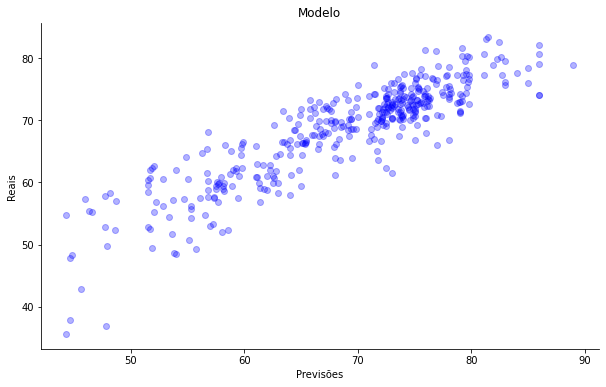

In [115]:
# Plot das previsões
dsa_cria_scatter(df_previsoes.Valor_Real, df_previsoes.Valor_Previsto, 'Modelo', 'Previsões', 'Reais')

In [116]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v1))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v1))

Mean Absolute Error: 3.266189451721545
Mean Squared Error: 17.857320129264725
Root Mean Squared Error: 4.225792248710853
R2 Score: 0.7895014895328252


### Versão 2 do Modelo - Regressão Lasso (Regularização L1)

In [117]:
# O alpha controla a força da regularização
modelo_dsa_v2 = Lasso(alpha = 1.0)  

In [118]:
# Treina o modelo
modelo_dsa_v2.fit(x_treino_scaled, y_treino)

Lasso()

In [119]:
# Previsões com dados de treino
y_pred_treino_v2 = modelo_dsa_v2.predict(x_treino_scaled)

In [120]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v2)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v2))

Mean Absolute Error: 3.5248340682223116
Mean Squared Error: 21.865597110276294
Root Mean Squared Error: 4.676066414228555
R2 Score: 0.7398744334211583


In [121]:
# Previsões com dados de teste com padronização 
y_pred_teste_v2 = modelo_dsa_v2.predict(x_teste_scaled)

In [122]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v2))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v2))

Mean Absolute Error: 3.562012369887744
Mean Squared Error: 21.2369395003075
Root Mean Squared Error: 4.608355400824409
R2 Score: 0.7496632137780741


### Versão 3 do Modelo - Regressão Ridge (Regularização L2)

A regressão Ridge adiciona um termo de penalidade igual ao quadrado do tamanho dos coeficientes à função de custo. Isso força o modelo a manter os coeficientes pequenos, o que pode ajudar na redução do overfitting.

In [123]:
# Cria o modelo com regularização Ridge
# O alpha é o parâmetro de regularização
modelo_dsa_v3 = Ridge(alpha = 1.0)  

In [124]:
# Treinamento do modelo
modelo_dsa_v3.fit(x_treino_scaled, y_treino)

Ridge()

In [126]:
# Previsões com dados de treino
y_pred_treino_v3 = modelo_dsa_v3.predict(x_treino_scaled)

In [127]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v3)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v3))

Mean Absolute Error: 3.2947409386562523
Mean Squared Error: 19.41256839691876
Root Mean Squared Error: 4.405969631865245
R2 Score: 0.7690570567301923


In [128]:
# Previsões com dados de teste com padronização 
y_pred_teste_v3 = modelo_dsa_v3.predict(x_teste_scaled)

In [129]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v3))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v3))

Mean Absolute Error: 3.2662971013103372
Mean Squared Error: 17.857929844510906
Root Mean Squared Error: 4.225864390217805
R2 Score: 0.7894943023317109


### Versão 4 do modelo - Regressão Elastic Net

Elastic net é um combinação de regularizações L1 e L2. Ela pode ser útil quando há múltiplas características correlacionadas. Elastic net tem dois parâmetros para ajustar: um para a regularização L1 e outro para a L2.

In [130]:
# Cria o modelo de regularização Elastic Net
# alpha é a força da regularização: l1_ratio é a mistura entre L1 e L2
modelo_dsa_v4 = ElasticNet(alpha = 1.0, l1_ratio = 0.5)

In [131]:
?ElasticNet

In [132]:
# Treinamento do modelo
modelo_dsa_v4.fit(x_treino_scaled, y_treino)

ElasticNet()

In [136]:
# Previsões com dados de treino
y_pred_treino_v4 = modelo_dsa_v4.predict(x_treino_scaled)

In [137]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v4)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v4))

Mean Absolute Error: 3.7600839612120556
Mean Squared Error: 23.780726049354367
Root Mean Squared Error: 4.876548579615953
R2 Score: 0.7170909714449432


In [138]:
# Previsões com dados de teste com padronização 
y_pred_teste_v4 = modelo_dsa_v4.predict(x_teste_scaled)

In [139]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v4))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v4))

Mean Absolute Error: 3.7892029277347117
Mean Squared Error: 23.216197494635214
Root Mean Squared Error: 4.818318949035567
R2 Score: 0.7263321172518123


### Versão 5 do modelo - Otimização de Hiperparâmetros

In [143]:
# Definição do modelo
modelo_dsa_v5 = Ridge()

In [144]:
# Definição do espaço de hiperplano para otimização
parametros = {'alpha': [0.01, 0.1, 1, 10, 100]}

In [145]:
# Configuração do GridSearchCV
grid_search_dsa = GridSearchCV(estimator = modelo_dsa_v5, 
                               param_grid = parametros, 
                               cv = 5, 
                               scoring = 'neg_mean_squared_error', 
                               verbose = 1)

In [146]:
# Treinamento com otimização de hiperparâmetros
grid_search_dsa.fit(x_treino_scaled, y_treino)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [147]:
# Melhor modelo
melhor_modelo = grid_search_dsa.best_estimator_

In [148]:
# Previsões com dados de treino
y_pred_treino_v5 = melhor_modelo.predict(x_treino_scaled)

In [149]:
# Métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_error(y_treino, y_pred_treino_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino_v5)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino_v5))

Mean Absolute Error: 3.295747537684254
Mean Squared Error: 19.41335480629512
Root Mean Squared Error: 4.406058874583398
R2 Score: 0.7690477011574377


In [150]:
# Previsões com dados de teste
y_pred_teste_v5 = melhor_modelo.predict(x_teste_scaled)

In [151]:
# Métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_error(y_teste, y_pred_teste_v5))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste_v5))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste_v5))

Mean Absolute Error: 3.2672750615943604
Mean Squared Error: 17.8642215366659
Root Mean Squared Error: 4.226608751311848
R2 Score: 0.7894201371256577


In [152]:
# Imprime o melhor hiperparâmetro
print('Melhor alpha:', grid_search_dsa.best_params_['alpha'])

Melhor alpha: 10


### Seleção do modelo 

In [153]:
print('RMSE V1:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v1)))
print('RMSE V2:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v2)))
print('RMSE V3:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v3)))
print('RMSE V4:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v4)))
print('RMSE V5:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste_v5)))

RMSE V1: 4.225792248710853
RMSE V2: 4.608355400824409
RMSE V3: 4.225864390217805
RMSE V4: 4.818318949035567
RMSE V5: 4.226608751311848


In [154]:
print('R2 Score Modelo V1:', metrics.r2_score(y_teste, y_pred_teste_v1))
print('R2 Score Modelo V2:', metrics.r2_score(y_teste, y_pred_teste_v2))
print('R2 Score Modelo V3:', metrics.r2_score(y_teste, y_pred_teste_v3))
print('R2 Score Modelo V4:', metrics.r2_score(y_teste, y_pred_teste_v4))
print('R2 Score Modelo V5:', metrics.r2_score(y_teste, y_pred_teste_v5))

R2 Score Modelo V1: 0.7895014895328252
R2 Score Modelo V2: 0.7496632137780741
R2 Score Modelo V3: 0.7894943023317109
R2 Score Modelo V4: 0.7263321172518123
R2 Score Modelo V5: 0.7894201371256577


> O modelo v1 que apresenta a melhor performance geral, ao mesmo tempo que é o modelo mais simples. 

#### Plotando os resíduos e validando uma das suposições da Regressão Linear.

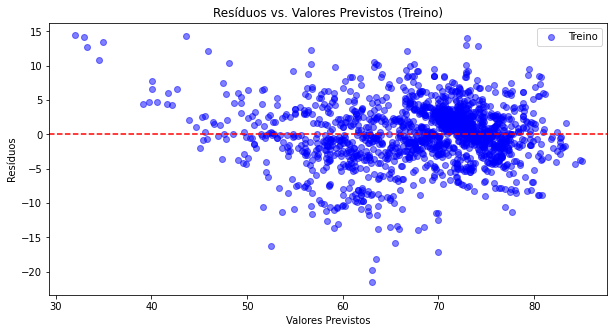

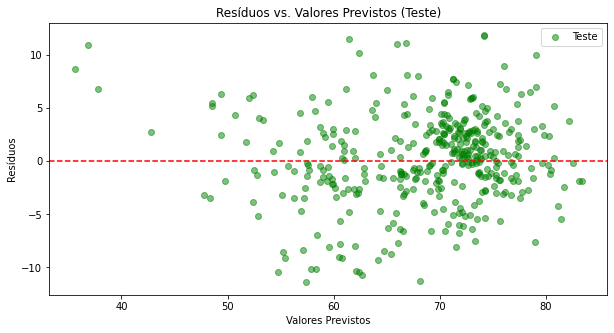

In [155]:
# Calculando os resíduos para o conjunto de treino
residuos_treino = y_treino - y_pred_treino_v1

# Calculando os resíduos para o conjunto de teste
residuos_teste = y_teste - y_pred_teste_v1

# Plotando os resíduos do conjunto de treino
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_treino_v1, residuos_treino, color = 'blue', label = 'Treino', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Treino)')
plt.legend()
plt.show()

# Plotando os resíduos do conjunto de teste
plt.figure(figsize = (10, 5))
plt.scatter(y_pred_teste_v1, residuos_teste, color = 'green', label = 'Teste', alpha = 0.5)
plt.axhline(y = 0, color = 'red', linestyle = '--')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.title('Resíduos vs. Valores Previstos (Teste)')
plt.legend()
plt.show()

Pelos gráficos:

**Distribuição dos Resíduos**: Idealmente, os resíduos devem estar distribuídos aleatoriamente ao redor da linha horizontal y=0, indicando que o modelo está fazendo boas previsões em média em todas as faixas de valores.

**Padrões nos Resíduos**: Se você notar padrões específicos, como uma forma curvilínea ou uma dispersão crescente ou decrescente dos resíduos conforme os valores previstos aumentam, isso pode indicar problemas no modelo, como a necessidade de transformação nas variáveis ou a presença de heteroscedasticidade.

Nosso modelo está pronto para o deploy.

In [156]:
# Salva o scaler
joblib.dump(dsa_scaler, 'dsa_scaler.pkl')

['dsa_scaler.pkl']

In [157]:
# Salva o modelo
joblib.dump(modelo_dsa_v1, 'modelo_dsa_v1.pkl')

['modelo_dsa_v1.pkl']

## Deploy e Uso do Modelo Para Previsão com Novos Dados

In [158]:
# Carrega padronizador e modelo
scaler_final = joblib.load('dsa_scaler.pkl')
modelo_final = joblib.load('modelo_dsa_v1.pkl')

In [159]:
# Carregando os novos dados
novos_dados = pd.read_csv('novos_dados.csv')

In [160]:
# Visualiza
novos_dados

,hiv,adult_mortality,school,thinness_till19,lifestyle,diphtheria
0,0.1,44.2,9.3,12.7,0.922,98.0


In [161]:
# Os novos dados precisam ser padronizados
novos_dados_scaled = scaler_final.transform(novos_dados)

In [162]:
# Visualiza
novos_dados_scaled

array([[-0.34334205, -1.02890346, -0.89466713,  1.89639702, -0.84601198,
         0.65780549]])

In [163]:
# Previsão
previsao = modelo_final.predict(novos_dados_scaled)

In [164]:
type(previsao)

numpy.ndarray

In [165]:
print('De acordo com os dados de entrada a expectativa de vida (em anos) é de aproximadamente:', 
      np.round(previsao, 2))

De acordo com os dados de entrada a expectativa de vida (em anos) é de aproximadamente: [[68.12]]


# Fim